In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("star_classification.csv")

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [ ]:
features = ["u", "g", "r", "i", "z", "redshift"]
target = "class"

df_model = df[features + [target]]

,u,g,r,i,z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810,0.576661
std,31.769291,31.750292,1.854760,1.757895,31.728152,0.730707
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971
25%,20.352353,18.965230,18.135828,17.732285,17.460677,0.054517
50%,22.179135,21.099835,20.125290,19.405145,19.004595,0.424173
75%,23.687440,22.123767,21.044785,20.396495,19.921120,0.704154
max,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


In [8]:
df_model.head()

,u,g,r,i,z,redshift,class
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY


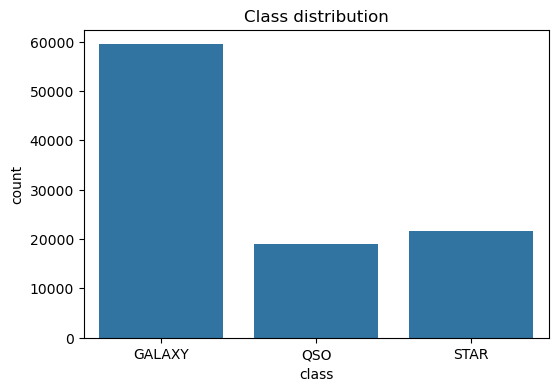

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_model, x="class")
plt.title("Class distribution")
plt.show()


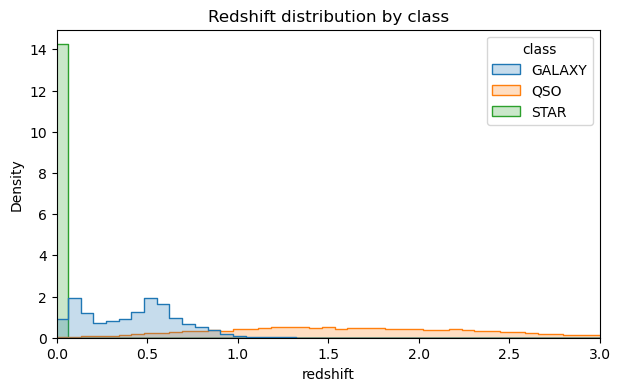

In [10]:
plt.figure(figsize=(7,4))
sns.histplot(
    data=df_model,
    x="redshift",
    hue="class",
    bins=100,
    element="step",
    stat="density",
    common_norm=False
)
plt.xlim(0, 3)
plt.title("Redshift distribution by class")
plt.show()


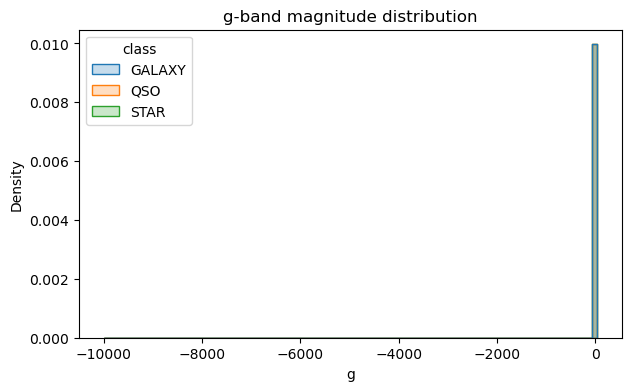

In [ ]:

plt.figure(figsize=(7,4))
sns.histplot(
    data=df_model,
    x="g",
    hue="class",
    bins=100,
    element="step",
    stat="density",
    common_norm=False
)
plt.title("g-band magnitude distribution")
plt.show()


In [19]:
df_model["g"].dtype
df_model["g"].min(), df_model["g"].max()


(-9999.0, 31.60224)

In [20]:
features = ["u", "g", "r", "i", "z", "redshift"]

df_model[features] = df_model[features].replace(-9999.0, float("nan"))

C:\Users\jasie\AppData\Local\Temp\ipykernel_14348\1822738162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[features] = df_model[features].replace(-9999.0, float("nan"))


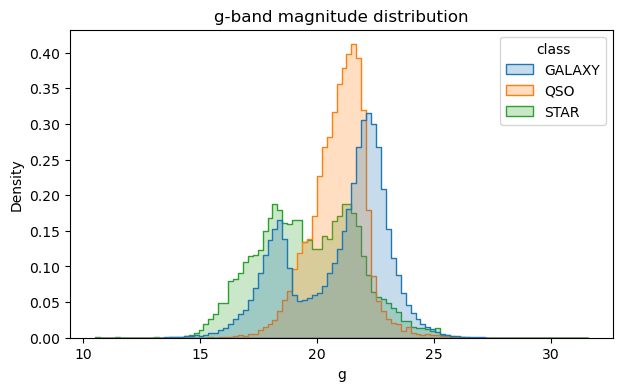

In [21]:
plt.figure(figsize=(7,4))
sns.histplot(
    data=df_model,
    x="g",
    hue="class",
    bins=100,
    element="step",
    stat="density",
    common_norm=False
)
plt.title("g-band magnitude distribution")
plt.show()


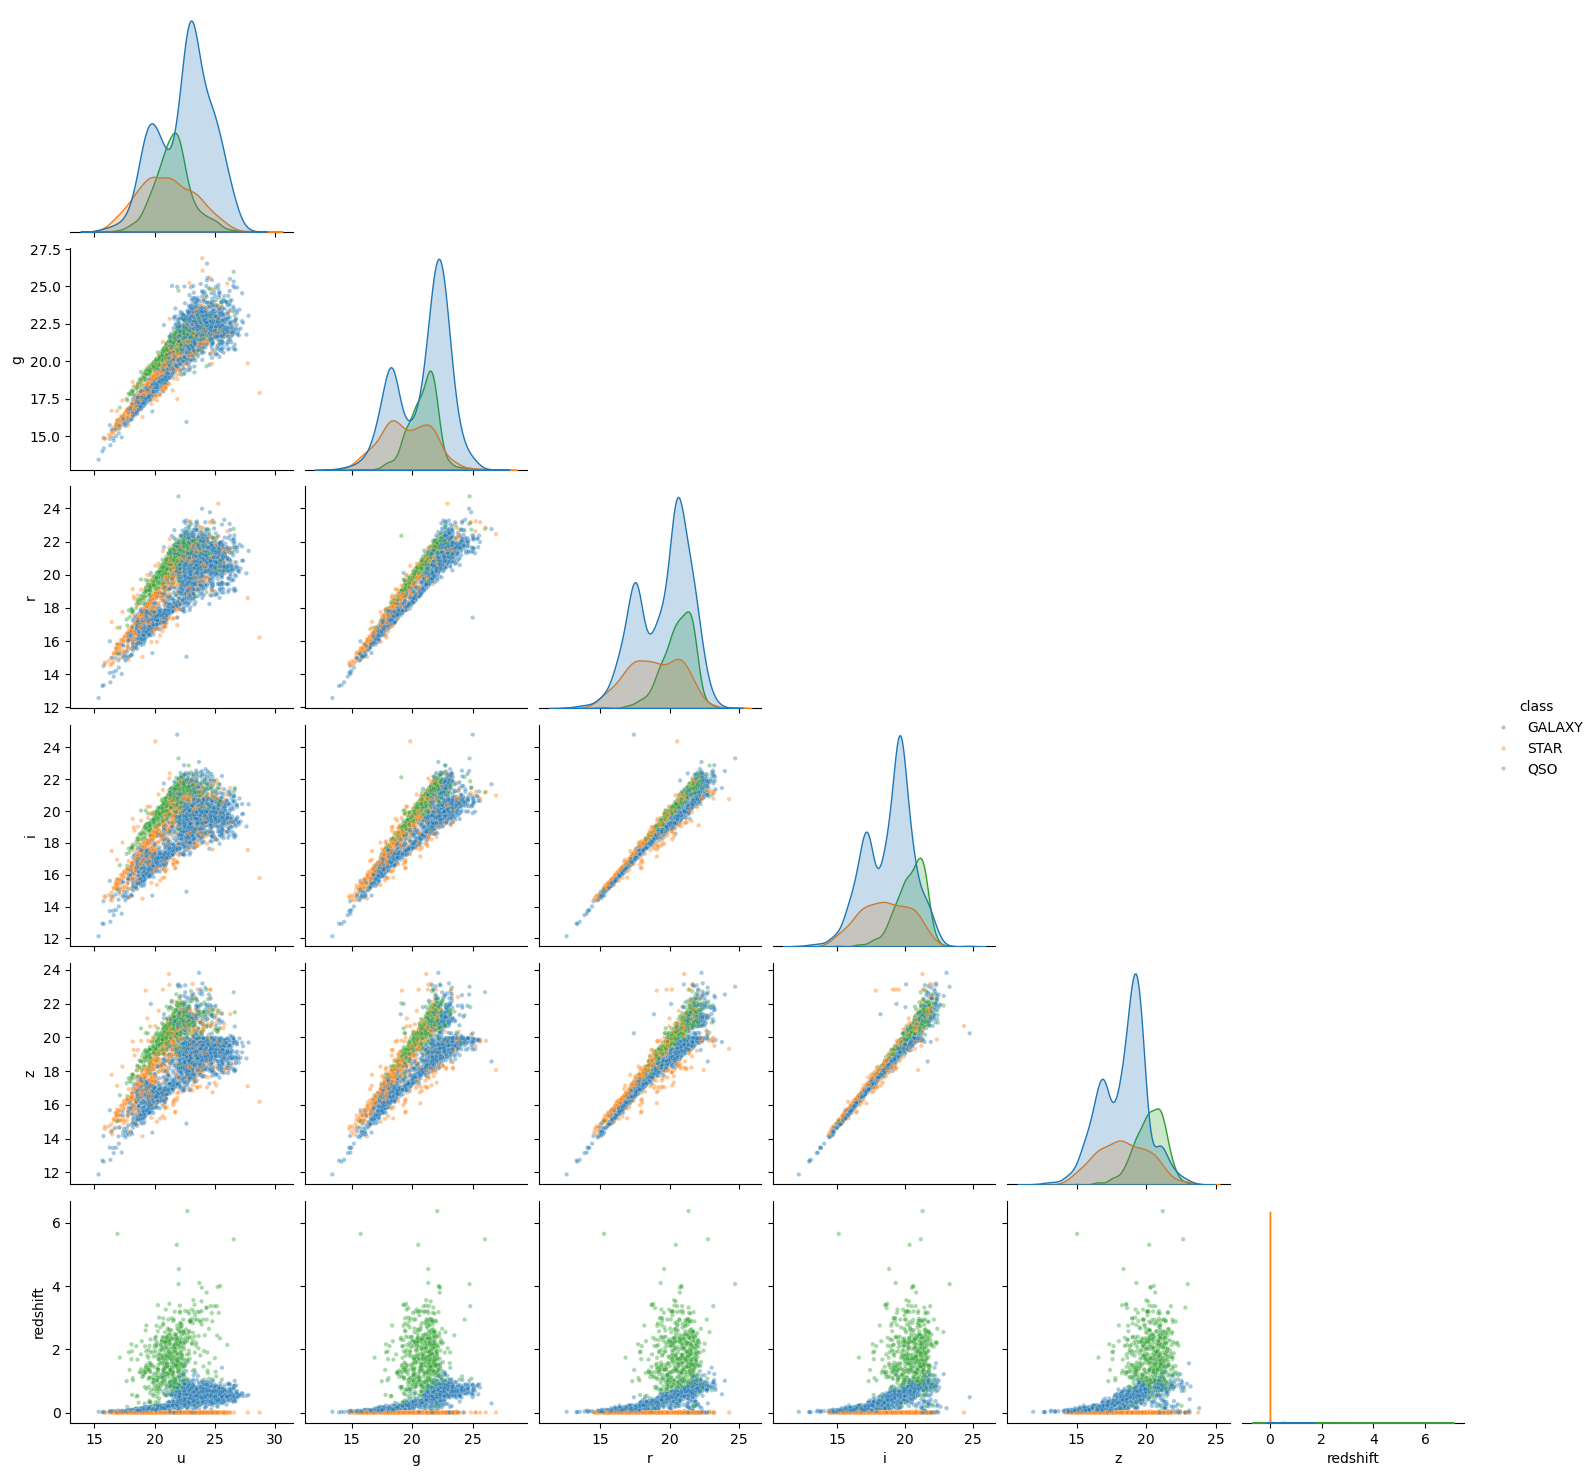

In [22]:
sample = df_model.sample(3000, random_state=42)

sns.pairplot(
    sample,
    vars=["u", "g", "r", "i", "z", "redshift"],
    hue="class",
    corner=True,
    plot_kws={"alpha": 0.4, "s": 10}
)
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe to avoid modifying original
df_model_clean = df_model.copy()


# Encode class
le = LabelEncoder()
df_model_clean["class_label"] = le.fit_transform(df_model_clean["class"])

# Check mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'GALAXY': np.int64(0), 'QSO': np.int64(1), 'STAR': np.int64(2)}


In [33]:
from sklearn.utils import resample

# Separate by class
df_galaxy = df_model_clean[df_model_clean["class_label"] == 0]
df_qso    = df_model_clean[df_model_clean["class_label"] == 1]
df_star   = df_model_clean[df_model_clean["class_label"] == 2]

# Find the size of the smallest class
min_size = min(len(df_galaxy), len(df_qso), len(df_star))

# Downsample each class to min_size
df_galaxy_down = resample(df_galaxy, replace=False, n_samples=min_size, random_state=42)
df_qso_down    = resample(df_qso, replace=False, n_samples=min_size, random_state=42)
df_star_down   = resample(df_star, replace=False, n_samples=min_size, random_state=42)

# Combine back
df_balanced = pd.concat([df_galaxy_down, df_qso_down, df_star_down])

# Shuffle rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

#deleting rows with missing values
df_balanced = df_balanced.dropna(subset=features)


# Check new class counts
print(df_balanced["class_label"].value_counts())


class_label
0    18960
1    18960
2    18960
Name: count, dtype: int64


## With redshift

In [34]:
from sklearn.model_selection import train_test_split

features = ["u", "g", "r", "i", "z", "redshift"]
target = "class_label"

X = df_balanced[features]
y = df_balanced[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize
lr = LogisticRegression(max_iter=1000, multi_class="multinomial")

# Train
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le.classes_))


c:\Users\jasie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

      GALAXY       0.92      0.91      0.91      3792
         QSO       0.95      0.92      0.94      3792
        STAR       0.96      1.00      0.98      3792

    accuracy                           0.94     11376
   macro avg       0.94      0.94      0.94     11376
weighted avg       0.94      0.94      0.94     11376



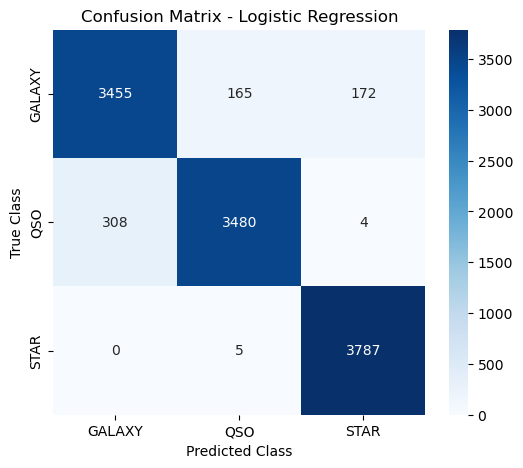

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict with Logistic Regression
y_pred_lr = lr.predict(X_test_scaled)  # scaled features for LR

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


              precision    recall  f1-score   support

      GALAXY       0.95      0.97      0.96      3792
         QSO       0.97      0.95      0.96      3792
        STAR       0.99      1.00      1.00      3792

    accuracy                           0.97     11376
   macro avg       0.97      0.97      0.97     11376
weighted avg       0.97      0.97      0.97     11376



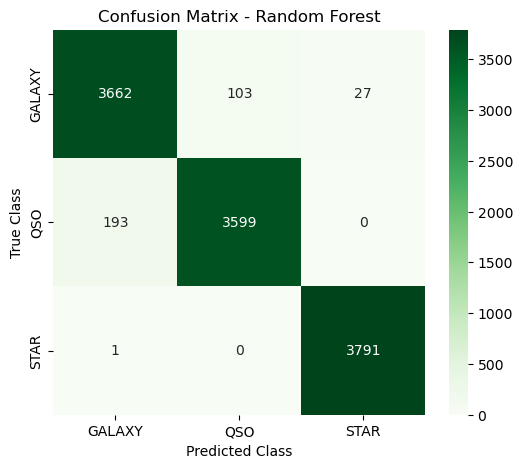

In [39]:

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Without redshift

In [41]:
from sklearn.model_selection import train_test_split

features = ["u", "g", "r", "i", "z"]
target = "class_label"

X = df_balanced[features]
y = df_balanced[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize
lr = LogisticRegression(max_iter=1000, multi_class="multinomial")

# Train
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

      GALAXY       0.70      0.65      0.68      3792
         QSO       0.74      0.85      0.79      3792
        STAR       0.62      0.57      0.59      3792

    accuracy                           0.69     11376
   macro avg       0.69      0.69      0.69     11376
weighted avg       0.69      0.69      0.69     11376



c:\Users\jasie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


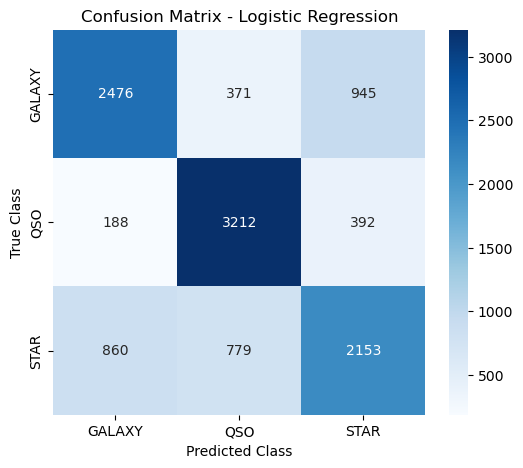

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict with Logistic Regression
y_pred_lr = lr.predict(X_test_scaled)  # scaled features for LR

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

              precision    recall  f1-score   support

      GALAXY       0.79      0.86      0.82      3792
         QSO       0.83      0.84      0.84      3792
        STAR       0.81      0.71      0.76      3792

    accuracy                           0.81     11376
   macro avg       0.81      0.81      0.80     11376
weighted avg       0.81      0.81      0.80     11376



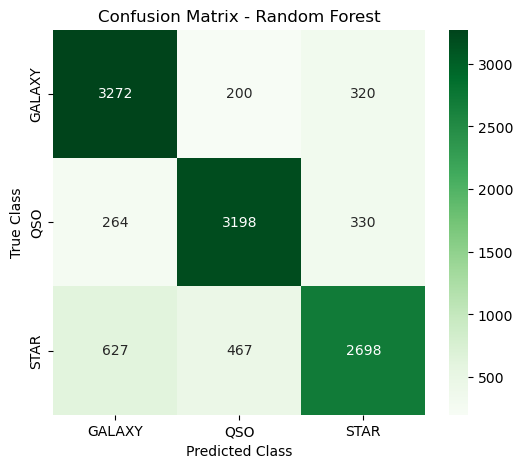

In [46]:
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix - Random Forest")
plt.show()
